In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import matplotlib.pyplot as plt
from itertools import product
from prophet import Prophet
from sklearn.linear_model import LinearRegression

In [3]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

Explore IHME Global Burden of Disease Chronic Respiratory Illness Death Data

In [4]:
# Read in IHME Chronic Respiratory Deaths
deaths_df = pd.read_csv('../raw_data/IHME_deaths.csv')


In [5]:
deaths_df

,Location,Year,Age,Sex,Cause of death or injury,Measure,Value,Lower bound,Upper bound
0,Tennessee,1990.0,All ages,Both,Chronic obstructive pulmonary disease,Deaths,1946.917981,1817.842578,2039.902755
1,Tennessee,1991.0,All ages,Both,Chronic obstructive pulmonary disease,Deaths,1957.997974,1825.045831,2059.105082
2,Tennessee,1992.0,All ages,Both,Chronic obstructive pulmonary disease,Deaths,2041.275378,1888.224198,2152.146343
3,Tennessee,1993.0,All ages,Both,Chronic obstructive pulmonary disease,Deaths,2234.162449,2076.533442,2345.102313
4,Tennessee,1994.0,All ages,Both,Chronic obstructive pulmonary disease,Deaths,2253.559136,2090.100434,2367.242409
5,Tennessee,1995.0,All ages,Both,Chronic obstructive pulmonary disease,Deaths,2332.692560,2166.264160,2453.382199
6,Tennessee,1996.0,All ages,Both,Chronic obstructive pulmonary disease,Deaths,2398.854261,2234.627263,2526.734202
7,Tennessee,1997.0,All ages,Both,Chronic obstructive pulmonary disease,Deaths,2567.097236,2394.645400,2709.583503
8,Tennessee,1998.0,All ages,Both,Chronic obstructive pulmonary disease,Deaths,2730.996433,2526.559838,2885.530037
9,Tennessee,1999.0,All ages,Both,Chronic obstructive pulmonary disease,Deaths,2935.568973,2723.539020,3091.238435


Clean Data - Only keep Year and Value (count of deaths)

In [6]:
# Drop not needed columns
deaths_df.drop(columns=["Location", "Age", "Sex", "Cause of death or injury", "Measure", "Lower bound", "Upper bound"], inplace=True)

In [7]:
# Drop last row with labels
cleaned_deaths = deaths_df[:-1].copy()

Plot data

Text(0, 0.5, 'Year')

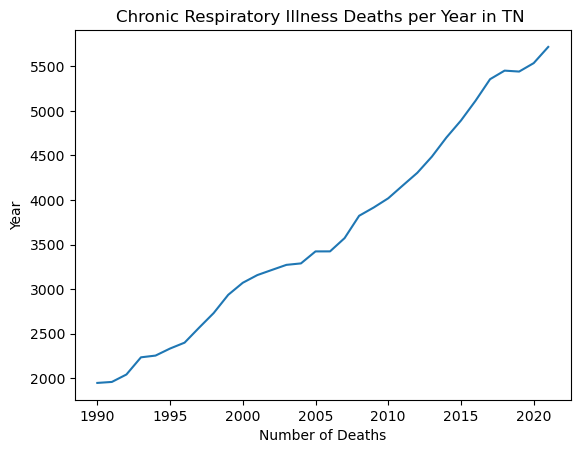

In [8]:
plt.plot(cleaned_deaths['Year'], cleaned_deaths['Value'])
plt.title("Chronic Respiratory Illness Deaths per Year in TN ")
plt.xlabel("Number of Deaths")
plt.ylabel("Year")

Due to increasing and linear trend, Use Linear Regression to Forcast Deaths till 2050 for later analysis

In [9]:
cleaned_deaths.set_index('Year', inplace=True)

In [ ]:
# Reshape for sklearn
years = cleaned_deaths.index.values.reshape(-1, 1)
deaths = cleaned_deaths['Value'].values

# Create and train the linear regression model
model = LinearRegression()
model.fit(years, deaths)

# Create array of years to forcast and reshape for sklearn
future_years = np.arange(2021, 2051).reshape(-1, 1)

# Predict future deaths
future_deaths = model.predict(future_years)

# Add these predictions to a DataFrame for future use
future_deaths_df = pd.DataFrame({
    'Year': future_years.flatten(),
    'Value': future_deaths
})

# Display future_deaths_df to inspect the extended values
print(future_deaths_df)

    Year        Value
0   2021  5575.257904
1   2022  5699.615360
2   2023  5823.972817
3   2024  5948.330273
4   2025  6072.687729
5   2026  6197.045185
6   2027  6321.402642
7   2028  6445.760098
8   2029  6570.117554
9   2030  6694.475011
10  2031  6818.832467
11  2032  6943.189923
12  2033  7067.547379
13  2034  7191.904836
14  2035  7316.262292
15  2036  7440.619748
16  2037  7564.977205
17  2038  7689.334661
18  2039  7813.692117
19  2040  7938.049573
20  2041  8062.407030
21  2042  8186.764486
22  2043  8311.121942
23  2044  8435.479399
24  2045  8559.836855
25  2046  8684.194311
26  2047  8808.551767
27  2048  8932.909224
28  2049  9057.266680
29  2050  9181.624136


Plot historic and predicted Chronic Respiratory Illness Deaths

Text(0, 0.5, 'Year')

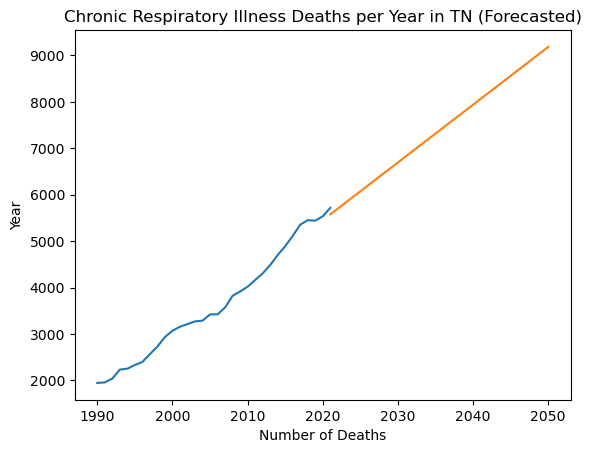

In [11]:
plt.plot(cleaned_deaths['Value'])
plt.plot(future_deaths_df['Year'], future_deaths_df['Value'])
plt.title("Chronic Respiratory Illness Deaths per Year in TN (Forecasted)")
plt.xlabel("Number of Deaths")
plt.ylabel("Year")

Combine past and predicted deaths into 1 DataFrame

In [12]:
cleaned_deaths.reset_index(inplace=True)

In [13]:
past_future_deaths = cleaned_deaths.append(future_deaths_df)

Load in smoke impact estimates from previous analysis

In [14]:
# Load the CSV data for smoke impact estimates
df = pd.read_csv('../generated_data/smoke_impact_fires_650miles.csv')

Merge Smoke Impact Estimates and Chronic Respiratory

In [15]:
# Rename columns for merge
past_future_deaths.rename(columns={'Year': 'year'}, inplace=True)

In [16]:
# Fix year column for merge
past_future_deaths['year'] = past_future_deaths['year'].astype(int)

In [17]:
# Ensure both data sources align by year and merge them
combined_df = df.merge(past_future_deaths, on='year')

In [18]:
# Change Value column name to deaths for readability
combined_df.rename(columns={"Value": "chronic_respiratory_illness_deaths"}, inplace=True)

In [19]:
# Drop uneeded columns
combined_df.drop(columns=['Unnamed: 0',  'size', 'distance' ], inplace=True)

In [20]:
# The dates are only ones where death values were present, 1990-2020
combined_df

,year,smoke_impact_estimate,chronic_respiratory_illness_deaths
0,1990,0.515072,1946.917981
1,1991,7.688121,1957.997974
2,1992,0.633549,2041.275378
3,1993,0.941433,2234.162449
4,1994,2.964267,2253.559136
5,1995,1.893943,2332.692560
6,1996,2.809147,2398.854261
7,1997,1.345199,2567.097236
8,1998,3.322704,2730.996433
9,1999,7.927402,2935.568973


Add the historical and predicted deaths as an external regressor to ARIMA time series model to predict smoke impact estimates with Chronic Respiratory Illness Deaths added in to make ARIMAX model

In [ ]:
# Set year as index and get timeseries data
combined_df.set_index('year', inplace=True)
ts = combined_df['smoke_impact_estimate']
# New exogenous variable
ex = combined_df['chronic_respiratory_illness_deaths']

# Split 80/20 for training and testing sets
train_size = int(len(ts) * 0.8)
train, test = ts[:train_size], ts[train_size:]
train_ex, test_ex = ex[:train_size], ex[train_size:]


Perform Cross Validation to find best ARIMAX Parameters and train and predict model

Best ARIMAX parameters: (1, 1, 3) with RMSE: 14.380282931370068


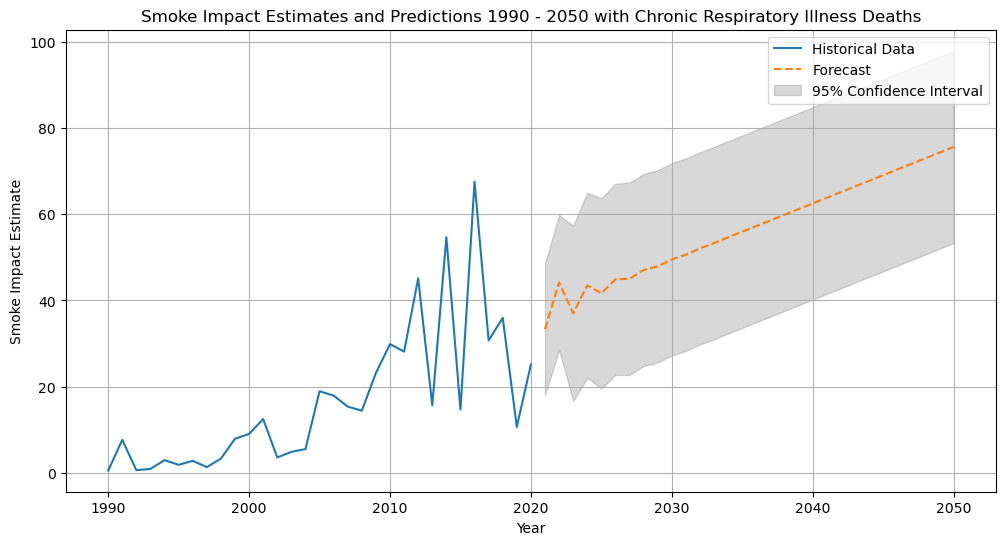

In [ ]:
# Range for parameter cv for p, d, q
p_values = range(0, 4)
d_values = range(0, 2)
q_values = range(0, 4)

#Grid search
best_values = None
best_rmse = float('inf')

# Grid search for p, d, q
for p, d, q in product(p_values, d_values, q_values):
    try:
        model = ARIMA(train, order=(p, d, q), exog=train_ex)
        model_fit = model.fit()
        predictions = model_fit.forecast(steps=len(test), exog=test_ex)

        # Find RMSE
        rmse = sqrt(mean_squared_error(test, predictions))

        # Update to keep params with lowest RMSE
        if rmse < best_rmse:
            best_rmse = rmse
            best_values = (p, d, q)
    except:
        continue

print(f'Best ARIMAX parameters: {best_values} with RMSE: {best_rmse}')

# Fit the model with best parameters on the full dataset
model = ARIMA(ts, order=best_values, exog=ex)
model_fit = model.fit()

# Forecast till 2050 with 95% confidence interval
future_years = range(2021, 2051)

future_exog = future_deaths_df['Value'].values.reshape(-1, 1)
forecast_result = model_fit.get_forecast(steps=len(future_years), exog=future_exog)
preds = forecast_result.predicted_mean
conf_int = forecast_result.conf_int(alpha=0.05)

# Create a DataFrame for the predictions
pred_df = pd.DataFrame({'year': future_years, 'predicted_smoke_impact': preds.values, 'lower_bound': conf_int.iloc[:, 0], 'upper_bound': conf_int.iloc[:, 1]})

# Plot the historical data, test data, and the forecast
plt.figure(figsize=(12, 6))
plt.plot(range(1990, 2021), ts, label='Historical Data')
plt.plot(pred_df['year'], pred_df['predicted_smoke_impact'], label='Forecast', linestyle='--')
plt.fill_between(pred_df['year'], pred_df['lower_bound'], pred_df['upper_bound'], color='gray', alpha=0.3, label='95% Confidence Interval')
plt.xlabel('Year')
plt.ylabel('Smoke Impact Estimate')
plt.title('Smoke Impact Estimates and Predictions 1990 - 2050 with Chronic Respiratory Illness Deaths')
plt.legend()
plt.grid(True)
plt.show()


Calcuate correlation between Deaths and Smoke Impact Estimates to see if there is a trend

In [28]:
reset_combined = combined_df.reset_index()

In [29]:
reset_combined

,year,smoke_impact_estimate,chronic_respiratory_illness_deaths
0,1990,0.515072,1946.917981
1,1991,7.688121,1957.997974
2,1992,0.633549,2041.275378
3,1993,0.941433,2234.162449
4,1994,2.964267,2253.559136
5,1995,1.893943,2332.692560
6,1996,2.809147,2398.854261
7,1997,1.345199,2567.097236
8,1998,3.322704,2730.996433
9,1999,7.927402,2935.568973


In [31]:
correlation = reset_combined['smoke_impact_estimate'].corr(reset_combined['chronic_respiratory_illness_deaths'])

In [32]:
correlation

0.7197967577525253